# Popular Data Science Questions  
## Using Data Science Stack Exchange to Inform Education Strategy

This project analyzes activity on the Data Science Stack Exchange to determine which topics a data science education company should prioritize. Rather than relying on intuition or industry hype, the analysis uses real user behavior data — including tag frequency, view counts, time trends, and favorite counts — to measure both popularity and engagement.

The objective is twofold:

1. Identify topics that attract the largest volume of discussion.
2. Determine which subjects generate disproportionately high interest relative to their overall prevalence.

By combining snapshot analysis (2019 question data), longitudinal trend analysis, and engagement metrics such as lift, this project distinguishes between broadly popular topics and those that demonstrate deeper learner value. The findings aim to inform a content strategy that balances mass appeal with high-impact, engagement-driven specialization.


todays' **most popular** topics
1. machine learning
2. python
3. deep learning
4. neural networks
5. classification
6. nlp
7. keras
8. scikit learn
9. tensor flow
10. time series

We extracted relevant columns from the SEDE Data Science Stack Exchange database.

```sql
SELECT Id, PostTypeId, CreationDate, Score, ViewCount, Tags, AnswerCount, FavoriteCount
  FROM Posts
  WHERE Year(CreationDate) = 2019 AND PostTypeID = 1;
```

this is 2019_questions.csv
  

In [133]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [134]:
questions = pd.read_csv("2019_questions.csv", parse_dates=["CreationDate"])
questions

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,44419,2019-01-23 09:21:13,1,21,<machine-learning><data-mining>,0,NaN
1,44420,2019-01-23 09:34:01,0,25,<machine-learning><regression><linear-regressi...,0,NaN
2,44423,2019-01-23 09:58:41,2,1651,<python><time-series><forecast><forecasting>,0,NaN
3,44427,2019-01-23 10:57:09,0,55,<machine-learning><scikit-learn><pca>,1,NaN
4,44428,2019-01-23 11:02:15,0,19,<dataset><bigdata><data><speech-to-text>,0,NaN
...,...,...,...,...,...,...,...
8834,55413,2019-07-10 09:08:31,1,39,<pca><dimensionality-reduction><linear-algebra>,1,1.0
8835,55414,2019-07-10 09:34:55,0,113,<keras><weight-initialization>,0,NaN
8836,55415,2019-07-10 09:45:37,1,212,<python><visualization><seaborn>,1,NaN
8837,55416,2019-07-10 09:59:56,0,22,<time-series>,0,NaN


In [135]:
questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id             8839 non-null   int64         
 1   CreationDate   8839 non-null   datetime64[ns]
 2   Score          8839 non-null   int64         
 3   ViewCount      8839 non-null   int64         
 4   Tags           8839 non-null   object        
 5   AnswerCount    8839 non-null   int64         
 6   FavoriteCount  1407 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 483.5+ KB


FavoriteCount has many missing values, others do not have missing values, tags are object types

In [136]:
questions["FavoriteCount"] #we can account missing values by inputting NaN as 0


0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
8834    1.0
8835    NaN
8836    NaN
8837    NaN
8838    0.0
Name: FavoriteCount, Length: 8839, dtype: float64

In [137]:
questions["Tags"] # we can clean this column, making a list

0                         <machine-learning><data-mining>
1       <machine-learning><regression><linear-regressi...
2            <python><time-series><forecast><forecasting>
3                   <machine-learning><scikit-learn><pca>
4                <dataset><bigdata><data><speech-to-text>
                              ...                        
8834      <pca><dimensionality-reduction><linear-algebra>
8835                       <keras><weight-initialization>
8836                     <python><visualization><seaborn>
8837                                        <time-series>
8838                                               <k-nn>
Name: Tags, Length: 8839, dtype: object

In [138]:
questions.fillna(value={"FavoriteCount": 0}, inplace=True)
questions["Tags"].apply(lambda value: type(value)).unique()
questions["FavoriteCount"] = questions["FavoriteCount"].astype(int)

In [139]:
questions.info()
questions

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id             8839 non-null   int64         
 1   CreationDate   8839 non-null   datetime64[ns]
 2   Score          8839 non-null   int64         
 3   ViewCount      8839 non-null   int64         
 4   Tags           8839 non-null   object        
 5   AnswerCount    8839 non-null   int64         
 6   FavoriteCount  8839 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 483.5+ KB


,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,44419,2019-01-23 09:21:13,1,21,<machine-learning><data-mining>,0,0
1,44420,2019-01-23 09:34:01,0,25,<machine-learning><regression><linear-regressi...,0,0
2,44423,2019-01-23 09:58:41,2,1651,<python><time-series><forecast><forecasting>,0,0
3,44427,2019-01-23 10:57:09,0,55,<machine-learning><scikit-learn><pca>,1,0
4,44428,2019-01-23 11:02:15,0,19,<dataset><bigdata><data><speech-to-text>,0,0
...,...,...,...,...,...,...,...
8834,55413,2019-07-10 09:08:31,1,39,<pca><dimensionality-reduction><linear-algebra>,1,1
8835,55414,2019-07-10 09:34:55,0,113,<keras><weight-initialization>,0,0
8836,55415,2019-07-10 09:45:37,1,212,<python><visualization><seaborn>,1,0
8837,55416,2019-07-10 09:59:56,0,22,<time-series>,0,0


In [140]:
questions["Tags"] = questions["Tags"].str.findall(r"<(.*?)>")
questions["Tags"]

0                         [machine-learning, data-mining]
1       [machine-learning, regression, linear-regressi...
2            [python, time-series, forecast, forecasting]
3                   [machine-learning, scikit-learn, pca]
4                [dataset, bigdata, data, speech-to-text]
                              ...                        
8834      [pca, dimensionality-reduction, linear-algebra]
8835                       [keras, weight-initialization]
8836                     [python, visualization, seaborn]
8837                                        [time-series]
8838                                               [k-nn]
Name: Tags, Length: 8839, dtype: object

In [141]:
all_tags = []
for row in questions["Tags"]:
    for i in row:
        all_tags.append(i)
        
print(len(all_tags))

26640


In [142]:
unique_tags = list(set(all_tags))
len(unique_tags)




526

In [143]:
used = {}
viewed = {tag:0 for tag in unique_tags}

for row, viewcount in zip(questions["Tags"], questions["ViewCount"]):
    for tag in row:
        if tag in unique_tags:
            viewed[tag] += viewcount
            

for i in all_tags:
    if i not in used:
        used[i] = 1
    else:
        used[i] += 1
            
    

<Axes: >

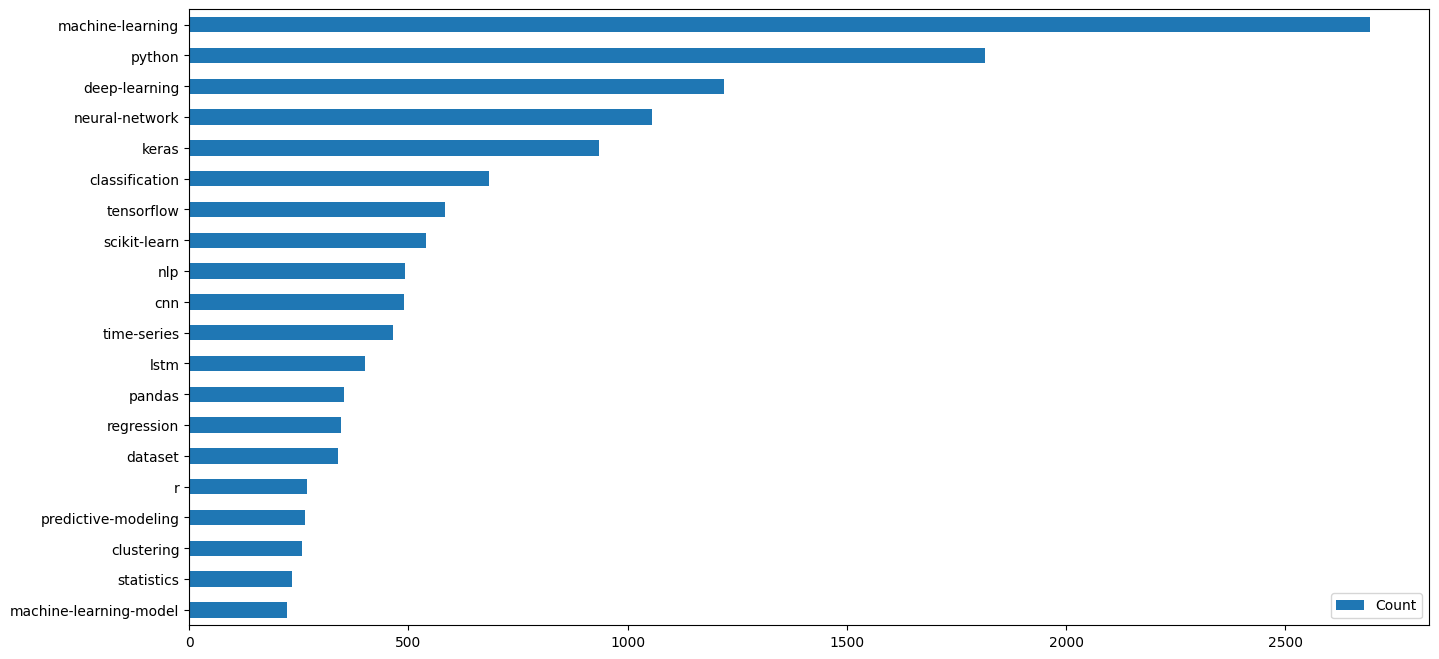

In [144]:
tag_count = pd.DataFrame.from_dict(used, orient="index")
tag_count.rename(columns={0: "Count"}, inplace=True)
most_used = tag_count.sort_values(by="Count").tail(20)
most_used.plot(kind="barh", figsize=(16,8))

<Axes: >

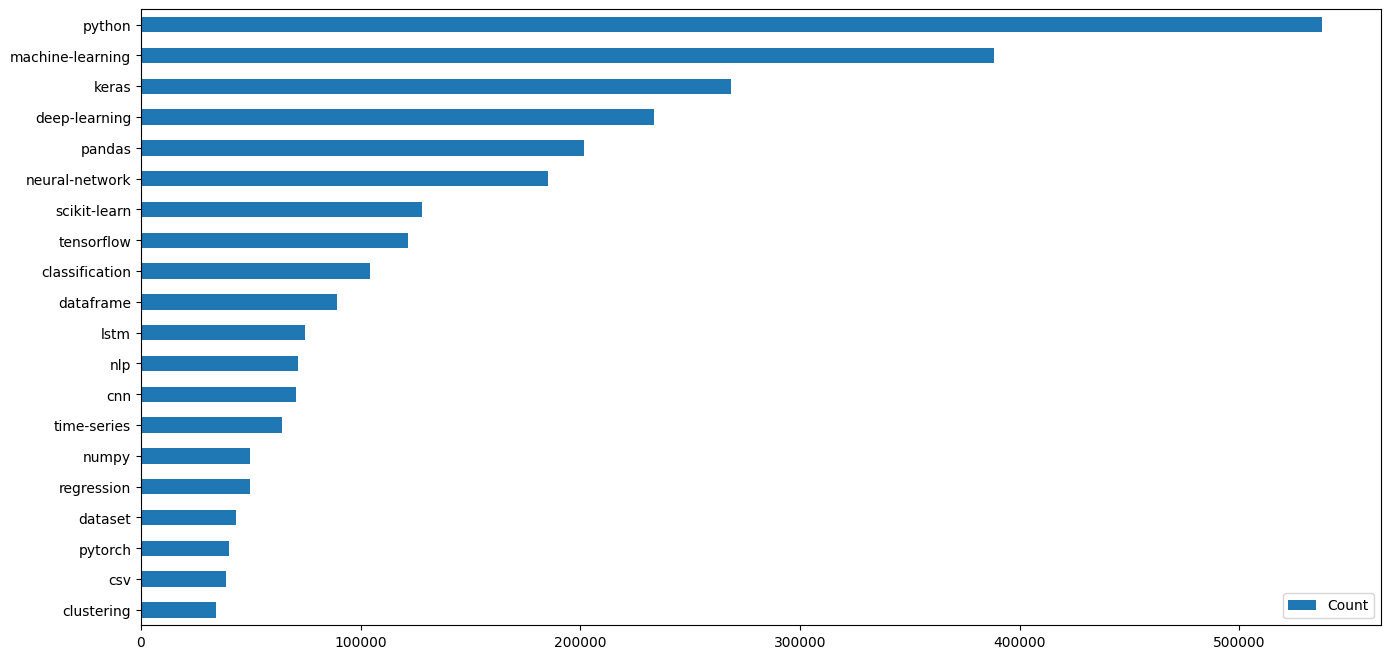

In [145]:
view_count = pd.DataFrame.from_dict(viewed, orient="index")
view_count.rename(columns={0: "Count"}, inplace=True)
most_viewed = view_count.sort_values(by="Count").tail(20)
most_viewed.plot(kind="barh", figsize=(16,8))


We can see from the graphs above that python, machine learning, keras and deep-learning are commonly viewed and used tags

In [146]:
in_used = pd.merge(most_used, most_viewed, how="left", left_index=True, right_index=True)
in_used

,Count_x,Count_y
machine-learning-model,224,NaN
statistics,234,NaN
clustering,257,33928.0
predictive-modeling,265,NaN
r,268,NaN
dataset,340,43151.0
regression,347,49451.0
pandas,354,201787.0
lstm,402,74458.0
time-series,466,64134.0


tags present in most_used but not present in most_viewed are:
- machine-learning-model
- statistics
- predictive-modeling
- r

In [147]:
pd.merge(most_used, most_viewed, how="right", left_index=True, right_index=True)

,Count_x,Count_y
clustering,257.0,33928
csv,NaN,38654
pytorch,NaN,40240
dataset,340.0,43151
regression,347.0,49451
numpy,NaN,49767
time-series,466.0,64134
cnn,489.0,70349
nlp,493.0,71382
lstm,402.0,74458


tags present in most_viewed but not in most_used are:
- csv
- pytorch
- dataframe

We also see that some tags stand out as being related: ie. pandas is a Python library.

How to know relationship between pairs of tags?
- if they are similar names (ie. machine-learning-model and machine-learning, or dataframe and dataset
- if they are similar fields (ie. dataframe and csv, machine learning and scikit learn and pytorch)
ex: deep-learning is field of machine learning 


Now fetch all questions ever asked on DSSE, dates and tags
```sql
SELECT Id, CreationDate, Tags
  FROM posts
 WHERE PostTypeId = 1;
 ```

In [148]:
all = pd.read_csv("all_questions.csv", parse_dates = ["CreationDate"])
all

,Id,CreationDate,Tags
0,45416,2019-02-12 00:36:29,<python><keras><tensorflow><cnn><probability>
1,45418,2019-02-12 00:50:39,<neural-network>
2,45422,2019-02-12 04:40:51,<python><ibm-watson><chatbot>
3,45426,2019-02-12 04:51:49,<keras>
4,45427,2019-02-12 05:08:24,<r><predictive-modeling><machine-learning-mode...
...,...,...,...
21571,36971,2018-08-15 14:19:01,<statistics><data>
21572,36974,2018-08-15 14:40:27,<machine-learning><neural-network><classifier>
21573,36975,2018-08-15 14:53:43,<machine-learning><classification>
21574,36979,2018-08-14 19:31:43,<tensorflow><python>


In [149]:
#clean Tags column
all["Tags"].apply(lambda value: type(value)).unique()
all["Tags"] = all["Tags"].str.findall(r"<(.*?)>")
all["Tags"]


0            [python, keras, tensorflow, cnn, probability]
1                                         [neural-network]
2                            [python, ibm-watson, chatbot]
3                                                  [keras]
4        [r, predictive-modeling, machine-learning-mode...
                               ...                        
21571                                   [statistics, data]
21572       [machine-learning, neural-network, classifier]
21573                   [machine-learning, classification]
21574                                 [tensorflow, python]
21575                  [python, deep-learning, tensorflow]
Name: Tags, Length: 21576, dtype: object

In [150]:
all

,Id,CreationDate,Tags
0,45416,2019-02-12 00:36:29,"[python, keras, tensorflow, cnn, probability]"
1,45418,2019-02-12 00:50:39,[neural-network]
2,45422,2019-02-12 04:40:51,"[python, ibm-watson, chatbot]"
3,45426,2019-02-12 04:51:49,[keras]
4,45427,2019-02-12 05:08:24,"[r, predictive-modeling, machine-learning-mode..."
...,...,...,...
21571,36971,2018-08-15 14:19:01,"[statistics, data]"
21572,36974,2018-08-15 14:40:27,"[machine-learning, neural-network, classifier]"
21573,36975,2018-08-15 14:53:43,"[machine-learning, classification]"
21574,36979,2018-08-14 19:31:43,"[tensorflow, python]"


This analysis will focus on deep learning and associated tags that align with its foundational concepts and techniques. To ensure trends reflect substantive developments rather than short-term noise, we track interest at three-month intervals.

In [151]:
deep = ["lstm", "cnn", "scikit-learn", "tensorflow", "keras", "neural-network", "deep-learning"]

In [152]:
def class_deep_learning(tags):
    for tag in tags:
        if tag in deep:
            return 1
    return 0

In [153]:
all["deep_learning"] = all["Tags"].apply(class_deep_learning)
all = all[all["CreationDate"].dt.year < 2020] #we don't have all of 2020


In [154]:
def fetch_quarter(datetime):
    year = str(datetime.year)[-2:]
    quarter = str(((datetime.month-1) // 3) + 1)
    return "{y}Q{q}".format(y=year, q=quarter)

all["Quarter"] = all["CreationDate"].apply(fetch_quarter)

/tmp/ipykernel_41/1855634169.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all["Quarter"] = all["CreationDate"].apply(fetch_quarter)


In [155]:
quarterly = all.groupby('Quarter').agg({"deep_learning": ['sum', 'size']})
quarterly.columns = ['DeepLearningQuestions', 'TotalQuestions']
quarterly["DeepLearningRate"] = quarterly["DeepLearningQuestions"]\
                                /quarterly["TotalQuestions"]
# The following is done to help with visualizations later.
quarterly.reset_index(inplace=True)
quarterly

,Quarter,DeepLearningQuestions,TotalQuestions,DeepLearningRate
0,14Q2,9,157,0.057325
1,14Q3,13,189,0.068783
2,14Q4,21,216,0.097222
3,15Q1,18,190,0.094737
4,15Q2,28,284,0.098592
5,15Q3,45,311,0.144695
6,15Q4,66,382,0.172775
7,16Q1,110,516,0.213178
8,16Q2,109,518,0.210425
9,16Q3,161,585,0.275214


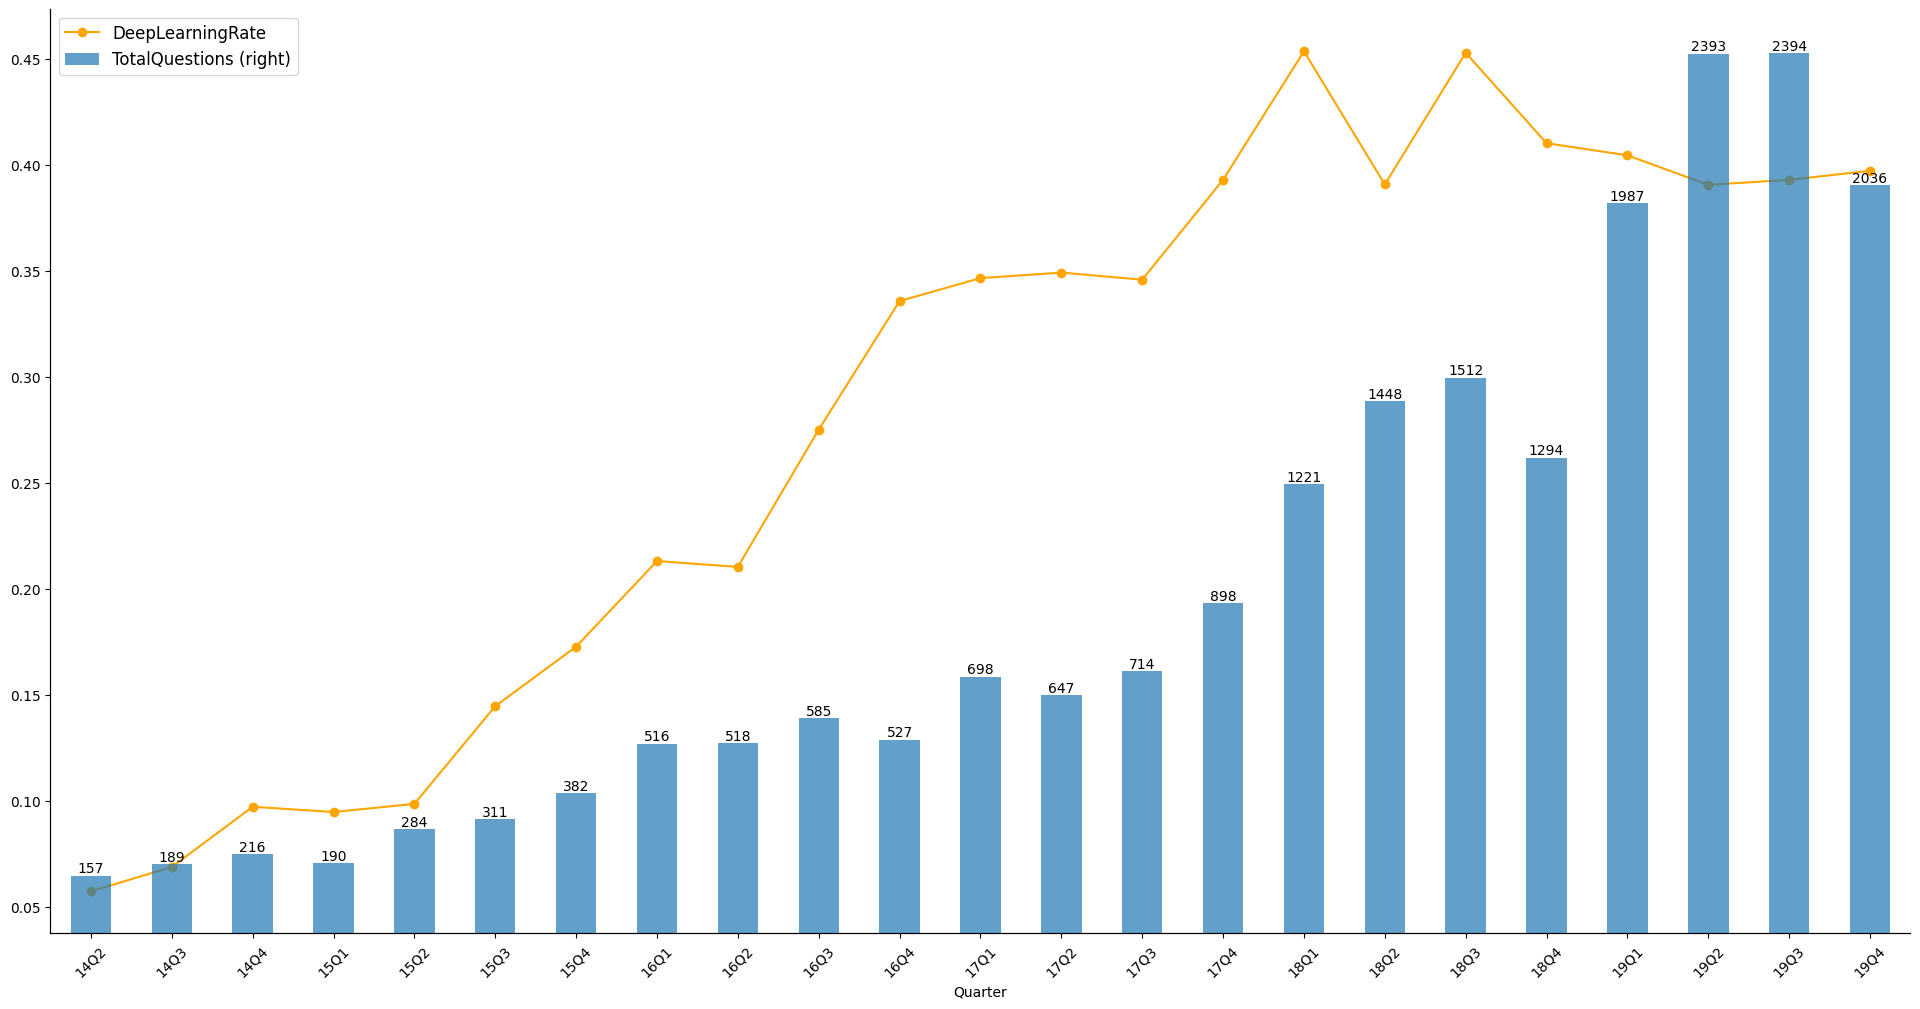

In [156]:
ax1 = quarterly.plot(x="Quarter", y="DeepLearningRate",
                    kind="line", linestyle="-", marker="o", color="orange",
                    figsize=(24,12)
                    )

ax2 = quarterly.plot(x="Quarter", y="TotalQuestions",
                     kind="bar", ax=ax1, secondary_y=True, alpha=0.7, rot=45)

for idx, t in quarterly["TotalQuestions"].items():
    ax2.text(idx, t, str(t), ha="center", va="bottom")
xlims = ax1.get_xlim()

ax1.get_legend().remove()

handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles=handles1 + handles2,
           labels=labels1 + labels2,
           loc="upper left", prop={"size": 12})


for ax in (ax1, ax2):
    for where in ("top", "right"):
        ax.spines[where].set_visible(False)
        ax.tick_params(right=False, labelright=False)

The data indicates substantial growth in interest in deep learning from 2014 to 2019, followed by a slight plateau in 2019. As there are no observable signals of declining popularity, it would be reasonable for a data science education company to continue expanding its deep learning content offerings.

Let's do it again with **Recommender Systems**


In [157]:
rec = ["recommender-system", "matrix-factorisation", "learning-to-rank", "ranking", "ndcg", "similarity", "cosine-distance"]
def class_rec_sys(tags):
    for tag in tags:
        if tag in rec:
            return 1
    return 0

In [158]:
all["rec_sys"] = all["Tags"].apply(class_rec_sys)


/tmp/ipykernel_41/3758481766.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all["rec_sys"] = all["Tags"].apply(class_rec_sys)


In [159]:
quarterly_rec = all.groupby('Quarter').agg({"rec_sys": ['sum', 'size']})
quarterly_rec.columns = ['RecommendersQuestions', 'TotalQuestions']
quarterly_rec["RecommendersRate"] = quarterly_rec["RecommendersQuestions"]\
                                /quarterly_rec["TotalQuestions"]
# The following is done to help with visualizations later.
quarterly_rec.reset_index(inplace=True)
quarterly_rec

,Quarter,RecommendersQuestions,TotalQuestions,RecommendersRate
0,14Q2,7,157,0.044586
1,14Q3,12,189,0.063492
2,14Q4,14,216,0.064815
3,15Q1,13,190,0.068421
4,15Q2,6,284,0.021127
5,15Q3,9,311,0.028939
6,15Q4,20,382,0.052356
7,16Q1,17,516,0.032946
8,16Q2,24,518,0.046332
9,16Q3,15,585,0.025641


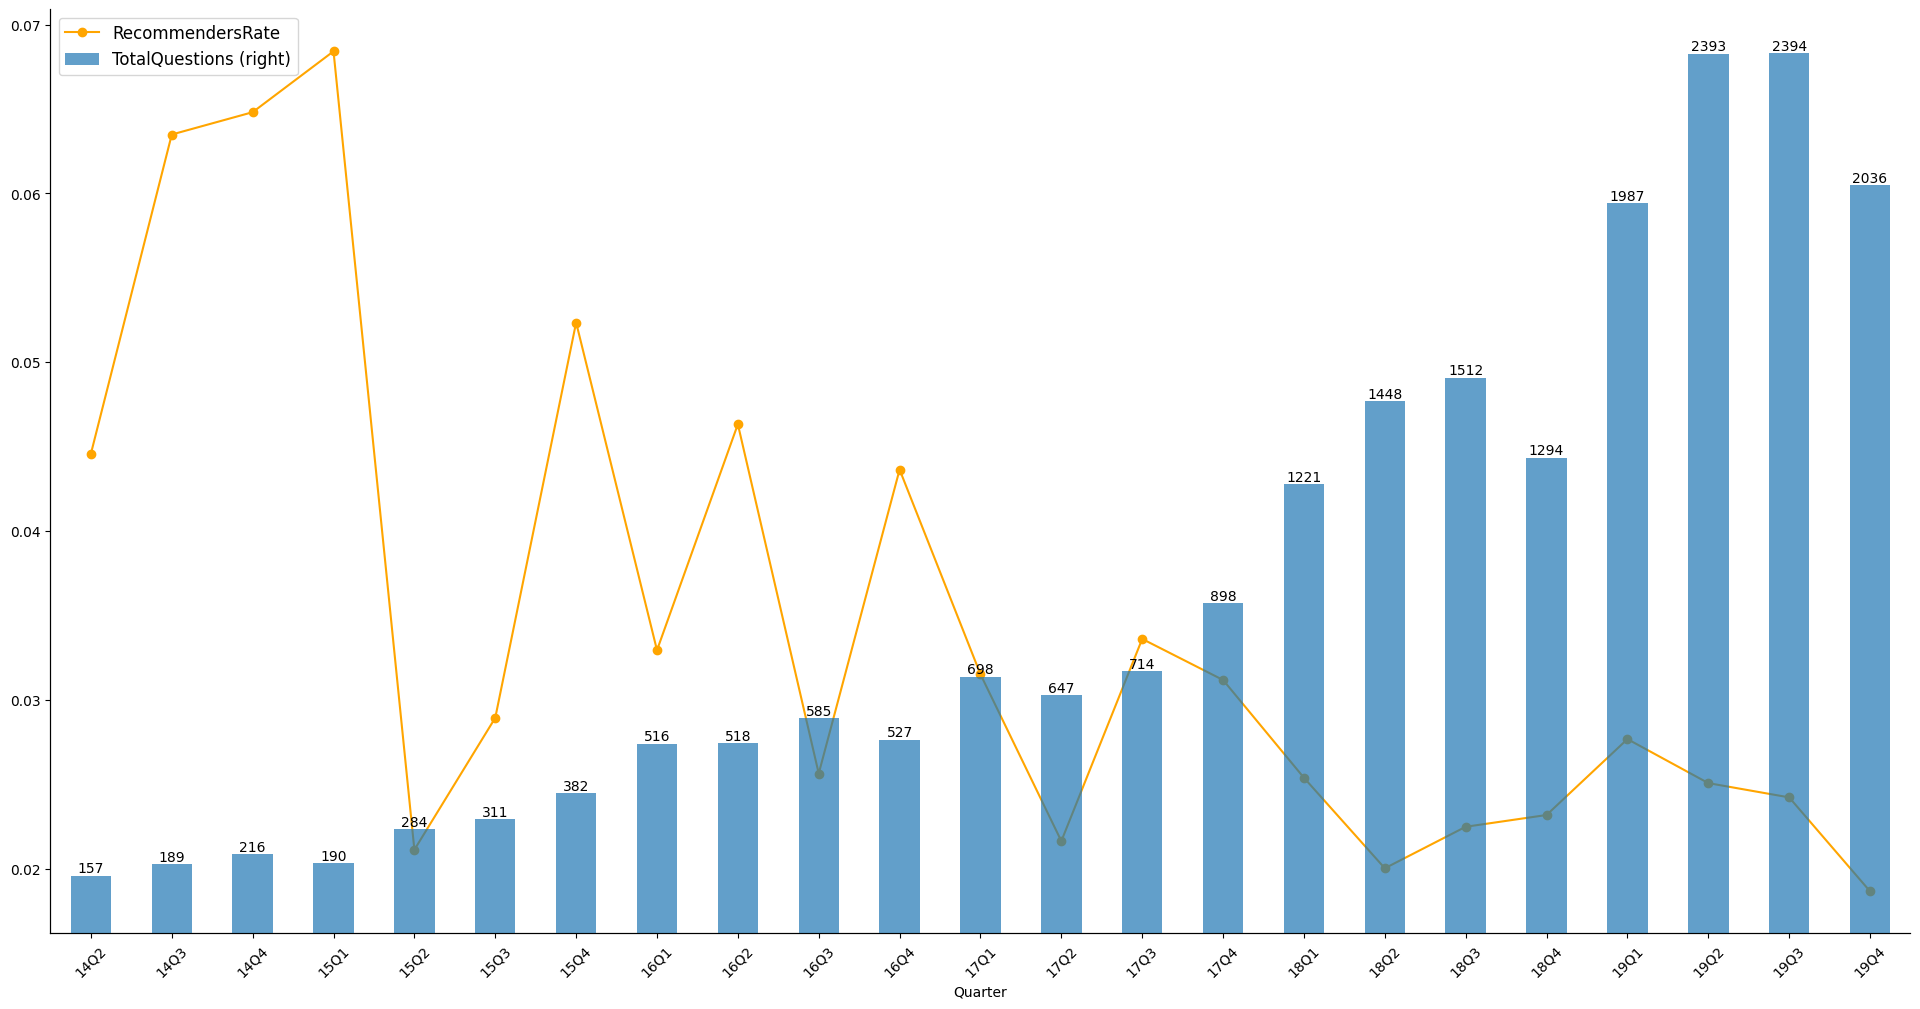

In [160]:
ax1 = quarterly_rec.plot(x="Quarter", y="RecommendersRate",
                    kind="line", linestyle="-", marker="o", color="orange",
                    figsize=(24,12)
                    )

ax2 = quarterly_rec.plot(x="Quarter", y="TotalQuestions",
                     kind="bar", ax=ax1, secondary_y=True, alpha=0.7, rot=45)

for idx, t in quarterly_rec["TotalQuestions"].items():
    ax2.text(idx, t, str(t), ha="center", va="bottom")
xlims = ax1.get_xlim()

ax1.get_legend().remove()

handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles=handles1 + handles2,
           labels=labels1 + labels2,
           loc="upper left", prop={"size": 12})


for ax in (ax1, ax2):
    for where in ("top", "right"):
        ax.spines[where].set_visible(False)
        ax.tick_params(right=False, labelright=False)

Although overall platform activity has increased substantially, the proportion of recommender system-related questions has remained relatively flat with minor fluctuations. This suggests stable but not accelerating interest in the topic relative to the broader data science ecosystem.

Other than tags correlating with view counts and used counts, we can also look at favorite counts


In [171]:
fav = questions.sort_values("FavoriteCount", ascending=False)
fav = fav[fav["FavoriteCount"] > 1]
fav

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
3139,48531,2019-04-03 15:16:24,45,7278,[data-wrangling],9,16
768,56676,2019-07-31 11:06:16,26,8373,"[machine-learning, deep-learning]",7,11
4233,49522,2019-04-18 08:06:24,18,6328,"[activation-function, bert, mathematics]",2,8
3433,48796,2019-04-07 08:04:54,10,4509,"[keras, lstm]",2,7
7568,64764,2019-12-13 12:15:59,10,186,"[machine-learning, data-product]",3,7
...,...,...,...,...,...,...,...
1239,57255,2019-08-08 17:08:44,4,987,"[xgboost, regularization, lightgbm]",2,2
98,55984,2019-07-19 08:34:35,3,66,"[machine-learning, evaluation, explainable-ai]",1,2
2356,47458,2019-03-17 07:58:50,3,444,"[gan, databases]",1,2
2880,60095,2019-09-12 04:58:59,1,51,"[dataset, bigdata]",2,2


In [172]:
fav_tags = {}

for tags in fav["Tags"]:
    for tag in tags:
        fav_tags[tag] = fav_tags.get(tag, 0) + 1
    

In [173]:
fav_tags = dict(
    sorted(fav_tags.items(), key=lambda item: item[1], reverse=True)
)

In [174]:
fav_tags

{'machine-learning': 104,
 'python': 56,
 'deep-learning': 46,
 'neural-network': 36,
 'keras': 31,
 'classification': 27,
 'cnn': 23,
 'scikit-learn': 20,
 'nlp': 15,
 'lstm': 14,
 'tensorflow': 12,
 'image-classification': 12,
 'time-series': 12,
 'dataset': 11,
 'feature-engineering': 9,
 'data': 9,
 'bert': 8,
 'data-science-model': 8,
 'predictive-modeling': 8,
 'statistics': 8,
 'training': 8,
 'gradient-descent': 7,
 'cross-validation': 7,
 'correlation': 7,
 'linear-regression': 7,
 'logistic-regression': 7,
 'xgboost': 7,
 'machine-learning-model': 7,
 'feature-selection': 6,
 'transfer-learning': 6,
 'categorical-data': 6,
 'reinforcement-learning': 6,
 'evaluation': 6,
 'regression': 6,
 'feature-scaling': 5,
 'pytorch': 5,
 'prediction': 5,
 'decision-trees': 5,
 'rnn': 5,
 'data-mining': 5,
 'word-embeddings': 5,
 'distance': 5,
 'recommender-system': 5,
 'random-forest': 5,
 'class-imbalance': 5,
 'object-detection': 5,
 'online-learning': 5,
 'natural-language-process': 

Users are more likely to favorite posts about practical model building and modern neural architectures rather than abstract theory.

We compare this with general posts from 2019 (since we started with dataframe of questions in 2019)

In [175]:
all_tags = {}

for tags in questions["Tags"]:
    for tag in tags:
        all_tags[tag] = all_tags.get(tag, 0) + 1


In [176]:
all_df = pd.DataFrame.from_dict(all_tags, orient="index", columns=["AllCount"])
fav_df = pd.DataFrame.from_dict(fav_tags, orient="index", columns=["FavCount"])

In [177]:
compare = all_df.merge(fav_df, left_index=True, right_index=True, how="left")
compare["FavCount"] = compare["FavCount"].fillna(0)


In [178]:
compare["AllRate"] = compare["AllCount"] / compare["AllCount"].sum()
compare["FavRate"] = compare["FavCount"] / compare["FavCount"].sum()


In [179]:
compare["Lift"] = compare["FavRate"] / compare["AllRate"]


In [180]:
compare.sort_values("Lift", ascending=False)
compare

,AllCount,FavCount,AllRate,FavRate,Lift
machine-learning,2693,104.0,0.101089,0.115172,1.139314
data-mining,217,5.0,0.008146,0.005537,0.679762
regression,347,6.0,0.013026,0.006645,0.510115
linear-regression,175,7.0,0.006569,0.007752,1.180066
regularization,50,1.0,0.001877,0.001107,0.590033
...,...,...,...,...,...
encoder,1,0.0,0.000038,0.000000,0.000000
label-smoothing,1,0.0,0.000038,0.000000,0.000000
label-flipping,1,0.0,0.000038,0.000000,0.000000
3d-object-detection,1,0.0,0.000038,0.000000,0.000000


In [181]:
min_count = 20 #remove rare tag
viz = compare[compare["AllCount"] >= min_count].copy()
viz

,AllCount,FavCount,AllRate,FavRate,Lift
machine-learning,2693,104.0,0.101089,0.115172,1.139314
data-mining,217,5.0,0.008146,0.005537,0.679762
regression,347,6.0,0.013026,0.006645,0.510115
linear-regression,175,7.0,0.006569,0.007752,1.180066
regularization,50,1.0,0.001877,0.001107,0.590033
...,...,...,...,...,...
audio-recognition,25,0.0,0.000938,0.000000,0.000000
image,32,1.0,0.001201,0.001107,0.921927
orange3,20,1.0,0.000751,0.001107,1.475083
confusion-matrix,27,0.0,0.001014,0.000000,0.000000


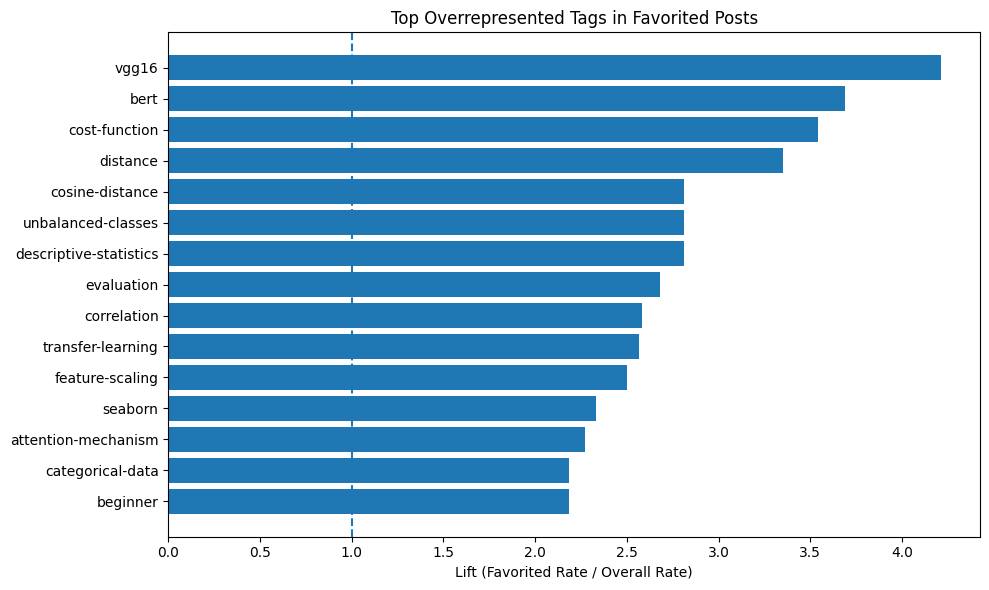

In [183]:
viz = viz.sort_values("Lift", ascending=False)
top_n = 15
top_tags = viz.head(top_n)

plt.figure(figsize=(10,6))
plt.barh(top_tags.index, top_tags["Lift"])
plt.gca().invert_yaxis()
plt.axvline(1, linestyle="--")  # baseline (neutral lift)
plt.xlabel("Lift (Favorited Rate / Overall Rate)")
plt.title("Top Overrepresented Tags in Favorited Posts")
plt.tight_layout()
plt.show()

While broad topics such as “machine-learning” dominate in overall frequency, niche technical concepts such as attention mechanisms, transfer learning, and representation-level methods exhibit disproportionately high engagement. This suggests that learners may seek deeper understanding in specialized subtopics rather than general overviews.

**Conclusion**
This project used Data Science Stack Exchange data to evaluate topic popularity, trend growth, and engagement through tag frequency, time-series analysis, and lift metrics. While foundational topics such as machine learning and Python dominate in overall volume, specialized deep learning concepts and implementation-focused topics demonstrate disproportionately high engagement. For a data science education company, a blended strategy combining foundational breadth with advanced technical depth would best capture both scale and learner interest.